In [12]:
#加载带有预训练权重的VGG16网络
from tensorflow.keras.applications.vgg16 import VGG16 

model = VGG16(weights = 'imagenet')

In [13]:
#为VGG16网络模型预处理一章输入图像

from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
 
img_path = 'C:\\Users\\hp-pc\\ML\\cat_100.jpg' 
#图像的本地路径
img = image.load_img(img_path, target_size = (224, 224))  #读取图像并调整大小

x = image.img_to_array(img) #将img图像转换为numpy数组 (224, 224, 3)
x = np.expand_dims(x, axis = 0) #将x转换为(1, 224, 224, 3)的数组
x = preprocess_input(x) #预处理输入

In [14]:
#在图像上运行预训练的VGG16网络，并且将预测向量解码为可读的模式
preds = model.predict(x)

print('Predicted:', decode_predictions(preds))

Predicted: [[('n03958227', 'plastic_bag', 0.24324383), ('n02123045', 'tabby', 0.22490391), ('n02124075', 'Egyptian_cat', 0.0793175), ('n02123159', 'tiger_cat', 0.06541321), ('n02123394', 'Persian_cat', 0.039460253)]]


C:\Users\hp-pc\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [15]:
np.argmax(preds)

728

In [16]:
#应用Grad_CAM算法
import tensorflow as tf
tf.compat.v1.disable_eager_execution() 
from tensorflow.keras import backend as K

african_elephant_output = model.output[: 728] 

last_conv_layer = model.get_layer('block5_conv3') 

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0] 

pooled_grads = K.mean(grads, axis = (0, 1, 2)) 

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])


pooled_grads_value, conv_layer_output_value = iterate([x]) 
l = len(conv_layer_output_value)

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis = -1)

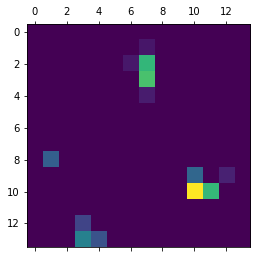

In [17]:
#热力图后处理
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [19]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('C:\\Users\\hp-pc\\ML\\cat_cam.jpg' , superimposed_img)

True